In [5]:
# Heart Disease Project
# Notebook 04: Model Explainability 
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.inspection import permutation_importance, PartialDependenceDisplay

plt.rcParams["figure.dpi"] = 120



In [7]:
# Load trained model
model = joblib.load("../models/best_model.pkl")
print("Model loaded")

# Load processed data
data = pd.read_csv("../data/processed/cleaned_train_data.csv")

X = data.drop("target", axis=1)
y = data["target"]

print("Data shape:", X.shape)

Model loaded
Data shape: (952, 11)


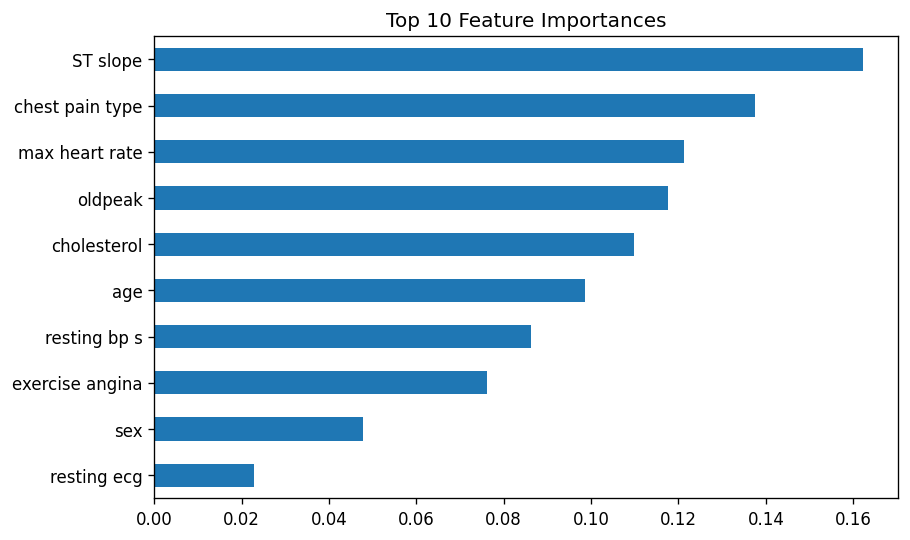

In [8]:
if hasattr(model, "feature_importances_"):
    importances = pd.Series(
        model.feature_importances_,
        index=X.columns
    ).sort_values(ascending=False)

    plt.figure(figsize=(8, 5))
    importances.head(10).plot(kind="barh")
    plt.title("Top 10 Feature Importances")
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("Model does not support built-in feature importance")



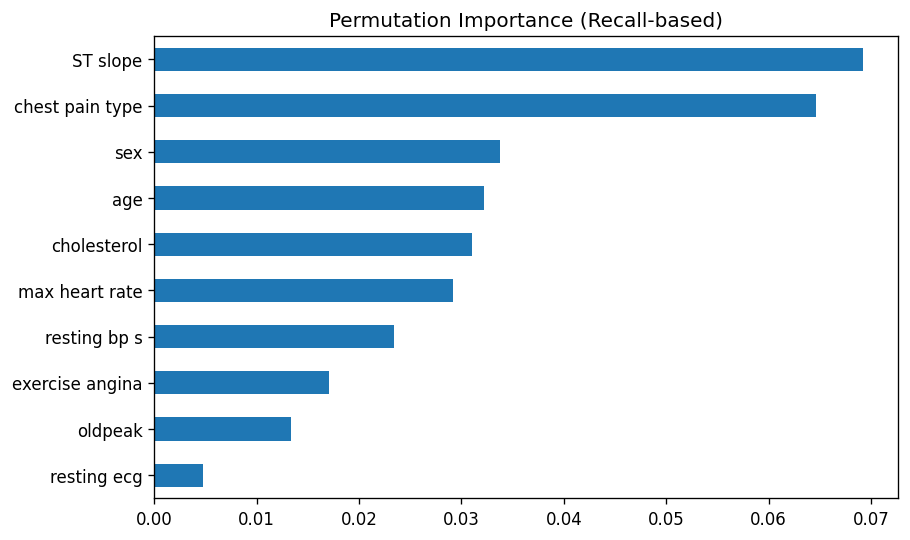

In [9]:
#Permutation Importance
result = permutation_importance(
    model,
    X,
    y,
    n_repeats=10,
    random_state=42,
    scoring="recall"
)

perm_importance = pd.Series(
    result.importances_mean,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
perm_importance.head(10).plot(kind="barh")
plt.title("Permutation Importance (Recall-based)")
plt.gca().invert_yaxis()
plt.show()


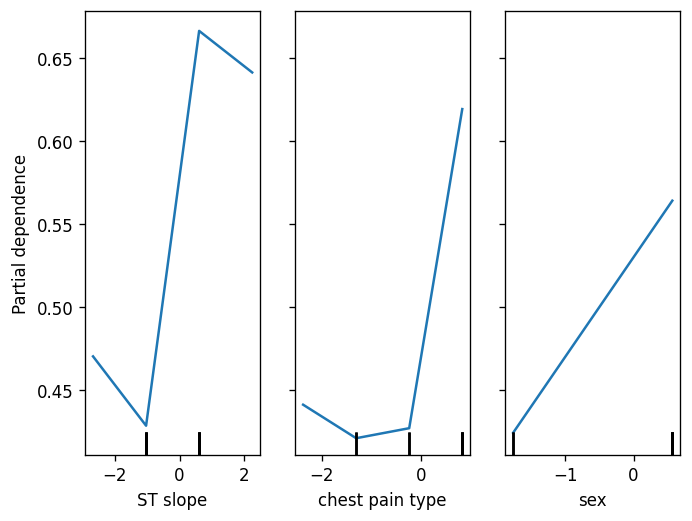

In [10]:
#Partial Dependence Plot
top_features = perm_importance.head(3).index.tolist()

PartialDependenceDisplay.from_estimator(
    model,
    X,
    features=top_features
)

plt.show()

